In [1]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317


In [2]:
function breakthrough(L, r, time, net_to_gross, pc)
    # Scaling exponents
    v = 0.88
    d = 1.45
    g = 2.1
    a = 2.5
    phi = 1.6
    b = 2.3
    psi = 2.0
    c = 2.9
    pi = 1

    corr_length = abs(net_to_gross - pc)^-v
    (r^-d 
        * (time / r^d)^-g 
        * exp(-a * (time/r^d)^-phi) 
        * exp(-b * (time/L^d)^psi)
        * exp(-c * (time/corr_length^d)^pi)
    )
end

breakthrough (generic function with 1 method)

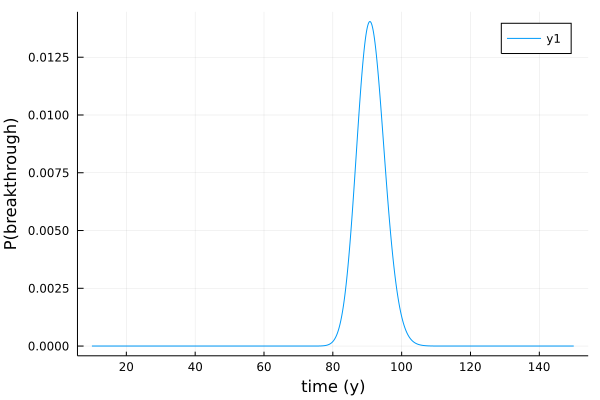

In [3]:
#test
L=40
r = 400/3.3
net_to_gross = 1
pc=0.2
time = range(10,150,length=1000)
P_breakthrough = breakthrough.(L,r,time, net_to_gross, pc)
plot(
    time, 
    P_breakthrough./sum(P_breakthrough), 
    ylabel="P(breakthrough)", 
    xlabel="time (y)"
)